# Final analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### RQ1: does the approach work?

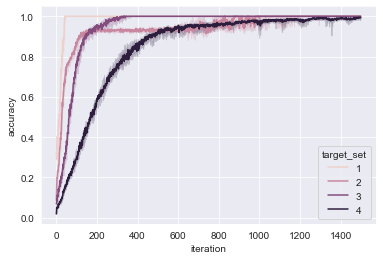

In [2]:
progress_df = pd.read_csv("../training/progress.csv")
sns.lineplot(data=progress_df, x="iteration", y="accuracy", hue="target_set", estimator="median", errorbar=("pi", 50))
plt.show()

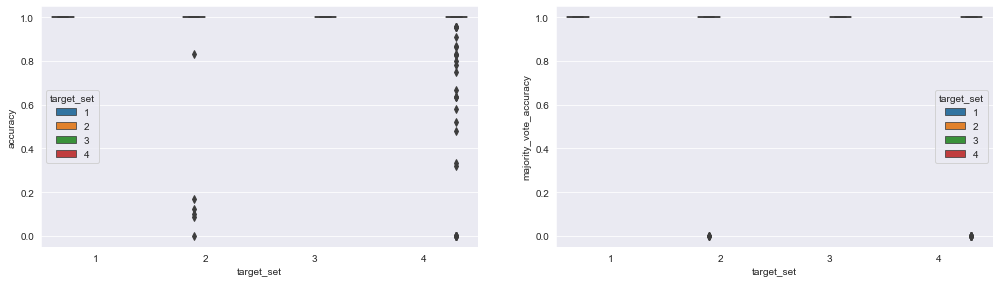

In [3]:
classification_df = pd.read_csv("../classifications/classification.csv")
classification_df_40 = classification_df[classification_df["step"] == 40]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
sns.boxplot(data=classification_df_40, x="target_set", y="accuracy", hue="target_set", ax=ax[0])
sns.boxplot(data=classification_df_40, x="target_set", y="majority_vote_accuracy", hue="target_set", ax=ax[1])
plt.show()

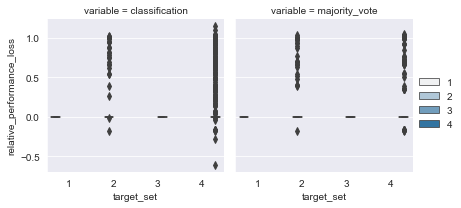

In [4]:
vx_df_long = pd.read_csv("../vsrs/classification_vx_rho.csv")

vx_df_long_40 = vx_df_long[vx_df_long["step"] == 40]
g = sns.FacetGrid(vx_df_long_40, col="variable")
g.map_dataframe(sns.boxplot, x="target_set", y="relative_performance_loss", hue="target_set")
g.add_legend()
plt.show()

### RQ2a: what impact does the network size have?

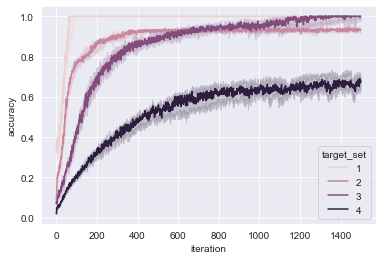

In [5]:
progress_small_df = pd.read_csv("../training/progress_small.csv")
sns.lineplot(data=progress_small_df, x="iteration", y="accuracy", hue="target_set", estimator="median",
             errorbar=("pi", 50))
plt.show()

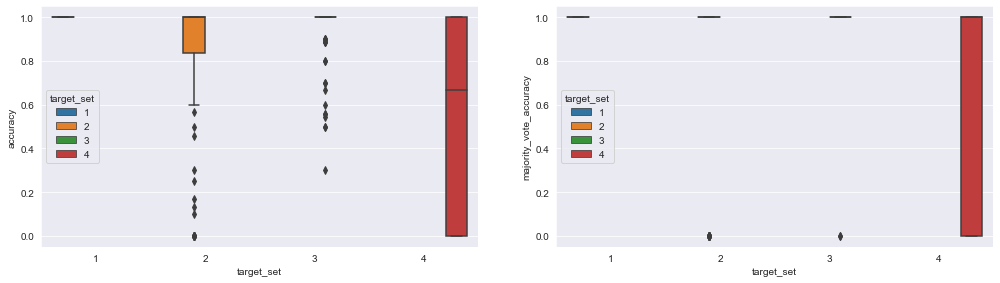

In [6]:
classification_small_df = pd.read_csv("../classifications/classification_small_40.csv")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
sns.boxplot(data=classification_small_df, x="target_set", y="accuracy", hue="target_set", ax=ax[0])
sns.boxplot(data=classification_small_df, x="target_set", y="majority_vote_accuracy", hue="target_set", ax=ax[1])
plt.show()

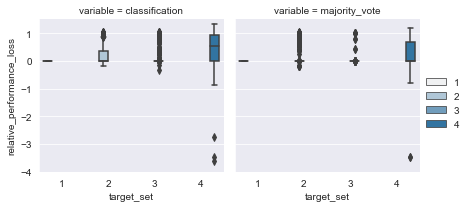

In [7]:
small_vx_rho_df = pd.read_csv("../vsrs/classification_small_40_vx_rho.csv")

g = sns.FacetGrid(small_vx_rho_df, col="variable")
g.map_dataframe(sns.boxplot, x="target_set", y="relative_performance_loss", hue="target_set")
g.add_legend()
plt.ylim(-4, 1.5)
plt.show()

### RQ2b: what role does the chosen NCA developmental step play?

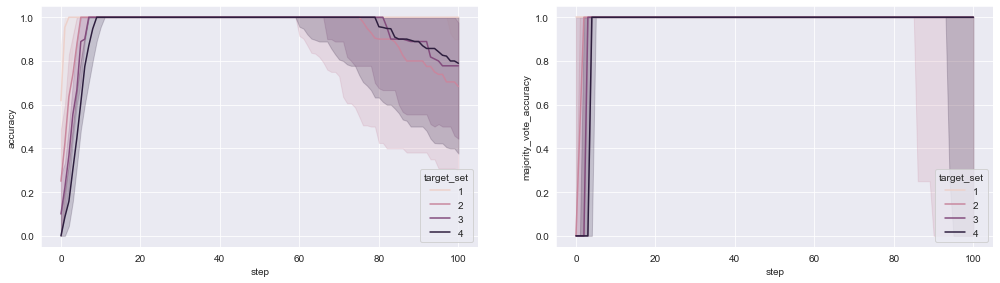

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
sns.lineplot(data=classification_df, x="step", y="accuracy", hue="target_set", ax=ax[0], estimator="median",
             errorbar=("pi", 50))
sns.lineplot(data=classification_df, x="step", y="majority_vote_accuracy", hue="target_set", ax=ax[1],
             estimator="median", errorbar=("pi", 50))
plt.show()

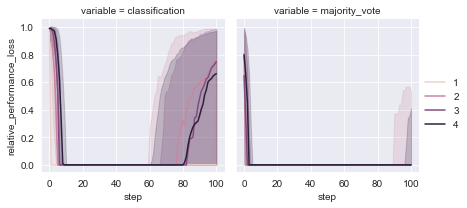

In [9]:
g = sns.FacetGrid(vx_df_long, col="variable")
g.map_dataframe(sns.lineplot, x="step", y="relative_performance_loss", hue="target_set", estimator="median",
                errorbar=("pi", 50))
g.add_legend()
plt.show()

### RQ3: can the approach deal with damages?

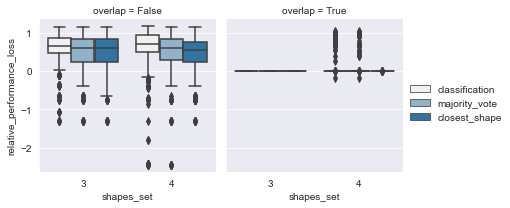

In [10]:
mismatch_class_df_long = pd.read_csv("../vsrs/mismatched_classification_40_vx_rho.csv")

g = sns.FacetGrid(mismatch_class_df_long, col="overlap")
g.map_dataframe(sns.boxplot, x="shapes_set", y="relative_performance_loss", hue="variable")
g.add_legend()
plt.show()

### Data export

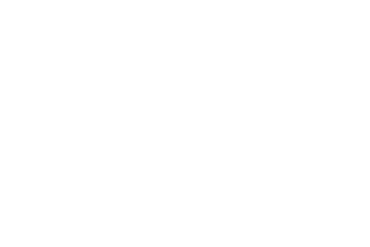

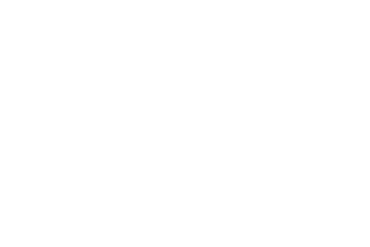

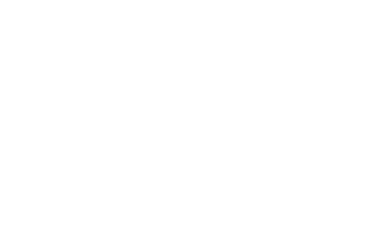

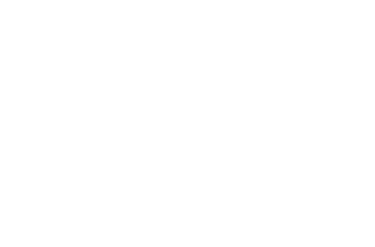

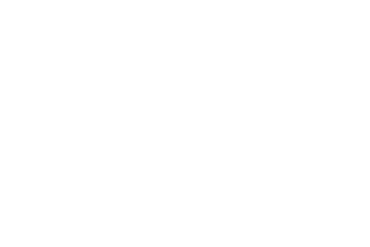

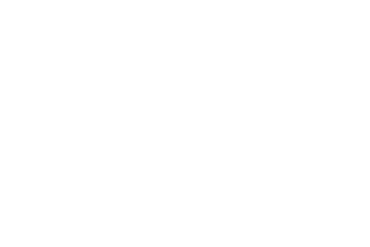

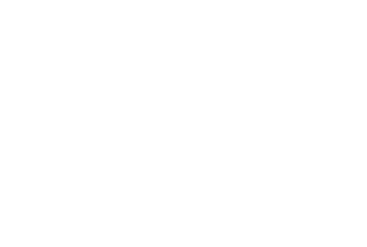

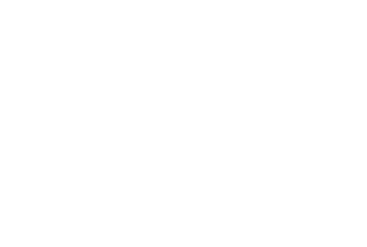

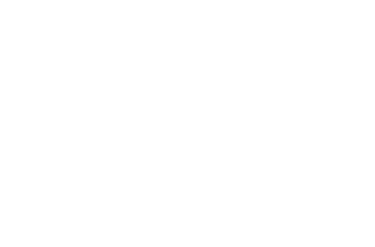

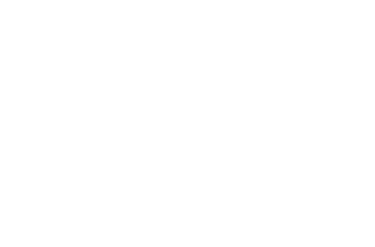

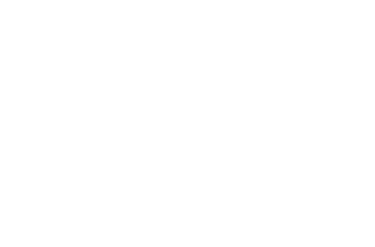

In [16]:
from utils import PgfplotsUtils

# rq1 data
PgfplotsUtils.line_plot(df=progress_df, x="iteration", y=["accuracy"], groups=["target_set"],
                        filename="../pgfplots/rq1_training_accuracy")
PgfplotsUtils.box_plot(df=classification_df_40, x="target_set", y="accuracy", filename="../pgfplots/rq1_accuracy_40")
PgfplotsUtils.box_plot(df=classification_df_40, x="target_set", y="majority_vote_accuracy",
                       filename="../pgfplots/rq1_majority_vote_accuracy_40")
PgfplotsUtils.box_plot(df=vx_df_long_40, x="target_set", y="relative_performance_loss", groups=["variable"],
                       filename="../pgfplots/rq1_rho_40")

# rq2-a data
PgfplotsUtils.line_plot(df=progress_small_df, x="iteration", y=["accuracy"], groups=["target_set"],
                        filename="../pgfplots/rq2a_training_accuracy")
PgfplotsUtils.box_plot(df=classification_small_df, x="target_set", y="accuracy",
                       filename="../pgfplots/rq2a_accuracy_40")
PgfplotsUtils.box_plot(df=classification_small_df, x="target_set", y="majority_vote_accuracy",
                       filename="../pgfplots/rq2a_majority_vote_accuracy_40")
PgfplotsUtils.box_plot(df=small_vx_rho_df, x="target_set", y="relative_performance_loss", groups=["variable"],
                       filename="../pgfplots/rq2a_rho_40")

# rq2-b data
PgfplotsUtils.line_plot(df=classification_df, x="step", y=["accuracy"], groups=["target_set"],
                        filename="../pgfplots/rq2b_accuracy")
PgfplotsUtils.line_plot(df=classification_df, x="step", y=["majority_vote_accuracy"], groups=["target_set"],
                        filename="../pgfplots/rq2b_majority_vote_accuracy")
PgfplotsUtils.line_plot(df=vx_df_long, x="step", y=["relative_performance_loss"], groups=["target_set", "variable"],
                        filename="../pgfplots/rq2b_rho")

# rq3 data
PgfplotsUtils.box_plot(df=mismatch_class_df_long[mismatch_class_df_long["overlap"] == False], x="shapes_set",
                       y="relative_performance_loss", groups=["variable"], filename="../pgfplots/rq3_rho")